# AICP Internship Task Week 6

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [5]:
df=pd.read_csv('births.csv')
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [7]:
for column in df:
    s=df[column].unique()
    print(s)

[1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 99. nan]
['F' 'M']
[  4046   4440   4454 ... 158939 173215 181235]


<b>Q.1: Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc.<b>

In [8]:
df['Decade']=(df['year'] // 10) * 10
df['Decade']

0        1960
1        1960
2        1960
3        1960
4        1960
         ... 
15542    2000
15543    2000
15544    2000
15545    2000
15546    2000
Name: Decade, Length: 15547, dtype: int64

<b>Q.2: Show the descriptive statistics of the data.<b>

In [9]:
df.describe()

,year,month,day,births,Decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


<b>Q.3: Check if your data contains any missing values
<b>

In [10]:
df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

In [24]:
df.dropna(subset=['day'])

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


df has null values in column day

<b>Q.4: What is the trend of male & female births every decade?<b>

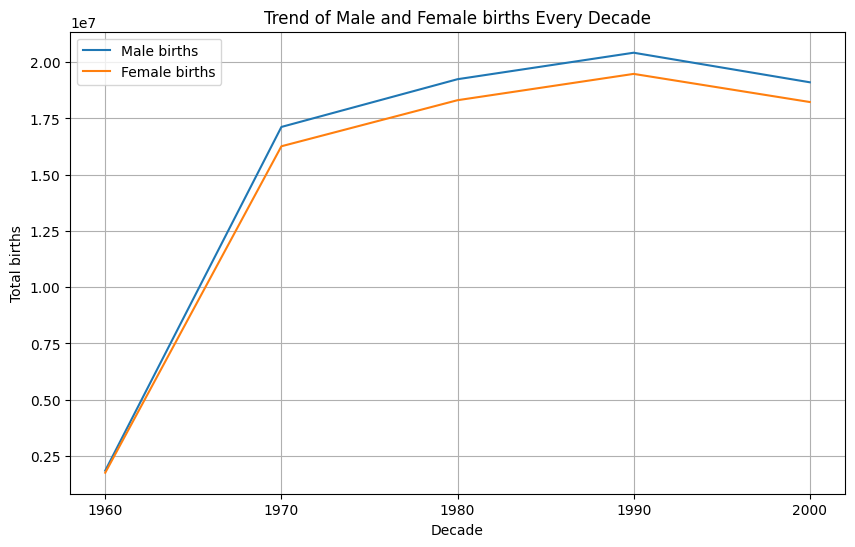

In [11]:
male_births = df[df['gender'] == 'M']
female_births = df[df['gender'] == 'F']

male_births_by_decade = male_births.groupby('Decade')['births'].sum()
female_births_by_decade = female_births.groupby('Decade')['births'].sum()


plt.figure(figsize=(10, 6))
sns.lineplot(x=male_births_by_decade.index, y=male_births_by_decade.values, label='Male births')
sns.lineplot(x=female_births_by_decade.index, y=female_births_by_decade.values, label='Female births')
plt.title('Trend of Male and Female births Every Decade')
plt.xlabel('Decade')
plt.ylabel('Total births')
plt.xticks(male_births_by_decade.index)
plt.legend()
plt.grid(True)
plt.show()

<b>Q.5: To remove outliers from dataset following techinque to include only those values that fall within 5
standard deviations from the mean.This is a common statistical technique used to focus on the central
tendency of the data while excluding extreme values.
Use this technique to remove outliers.
<b>

In [12]:
# Removing outliers
df = df[(df['births'] > df['births'].mean() - 5 * df['births'].std()) & (df['births'] < df['births'].mean() + 5 * df['births'].std())]


<b>Q.6: Plot births by weekday for several decades. Write down your observation.
<b>

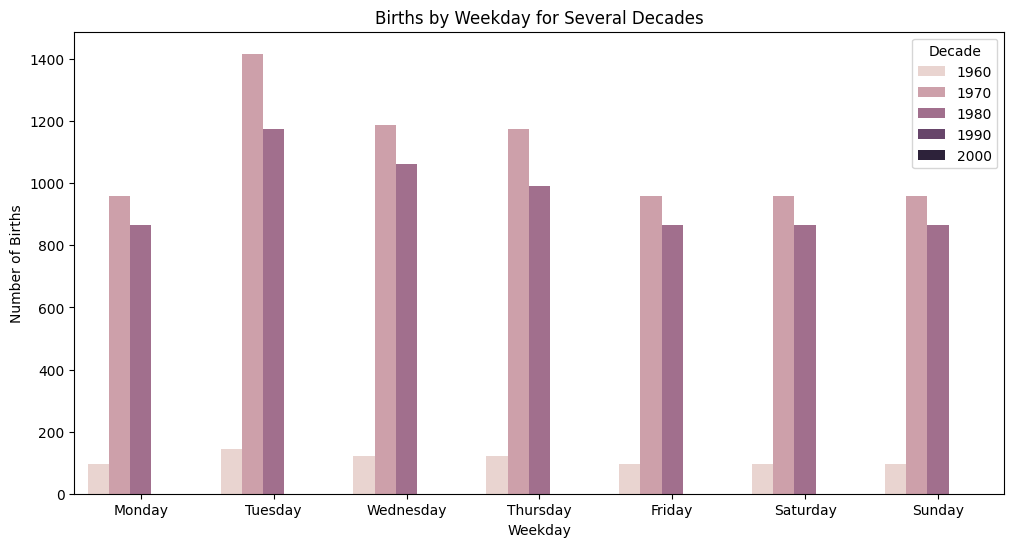

In [29]:

df['day'] = pd.to_numeric(df['day'])

day_to_weekday = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df['weekday'] = df['day'].apply(lambda x: day_to_weekday[int(x) % 7 + 1] if not pd.isnull(x) else 'Unknown')

plt.figure(figsize=(12, 6))
sns.countplot(x='weekday', data=df, hue='Decade', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Births by Weekday for Several Decades')
plt.xlabel('Weekday')
plt.ylabel('Number of Births')
plt.legend(title='Decade')
plt.show()

<li>most people were born on tuesday in all decades


<b>Q.7: Group the data by month and day separately<b>

In [16]:
grouped_by_month = df.groupby('month')
grouped_by_day = df.groupby('day')

df

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15309,1999,2,NaN,F,145172,1990
15357,2001,2,NaN,F,148640,2000
15381,2002,2,NaN,F,148745,2000
15405,2003,2,NaN,F,150278,2000


<b>Q.8: Focusing on the month and day only, you have a time series reflecting the average number of
births by date of the year. From this, plot the data<b>

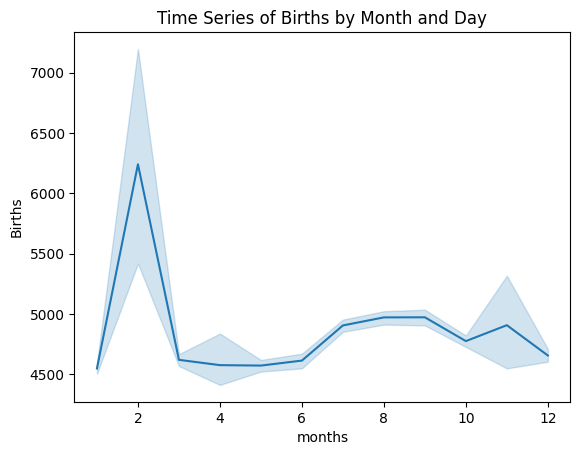

In [39]:
avgbirths=df.groupby('year')['births'].mean()
sns.lineplot(data=df, x='month', y='births')
plt.xlabel('months')
plt.ylabel('Births')
plt.title('Time Series of Births by Month and Day')
plt.show()